# Práctica Final

Integrantes: Diego Viñals, Ignacio Tejero, Miguel Ángel Lobo

## El objetivo de esta práctica es investigar la variación del crimen en función de eventos deportivos en Estados Unidos. Nos centraremos en la evolución del crimen en la ciudad de Boston en relación con los partidos de la NBA que se jugaron en la capital de Massachusetts.
## Nuestro grupo sostendrá la hipótesis de que los eventos deportivos pueden aumentar la inseguridad en las calles, lo que podría llevar a un aumento de la criminalidad.

In [939]:
# Importamos las librerias necesarias para poder depurar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### Importamos los dos datasets que vamos a utilizar, game.csv, que contiene un listado de todos los partidos de la NBA desde la temporada inaugural 1946/1947. El otro, csv_2017_2022.csv, contiene un listado de todos los datos de criminalidad de la ciudad de Boston desde el año 2017 hasta el año 2022

In [942]:
# Importamos CSV
partidos = pd.read_csv('./game.csv')
crimenes = pd.read_csv("./csv_2017_2022.csv")
partidos['game_date'] = pd.to_datetime(partidos['game_date'], dayfirst = True)
partidos = partidos.dropna()

crimenes

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,0,225520077,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022-02-02 00:00:00,2022,2,Wednesday,0,NaN,WASHINGTON ST,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)"
1,1,222648862,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022-02-05 18:25:00,2022,2,Saturday,18,NaN,WASHINGTON ST,42.329748,-71.084540,"(42.329748204791635, -71.08454011649543)"
2,2,222201764,724,NaN,AUTO THEFT,C6,200,0,2022-01-09 00:00:00,2022,1,Sunday,0,NaN,W BROADWAY,42.341288,-71.054679,"(42.341287504390436, -71.05467932649397)"
3,3,222201559,301,NaN,ROBBERY,D4,,0,2022-03-05 13:00:00,2022,3,Saturday,13,NaN,ALBANY ST,42.333184,-71.073939,"(42.333184490911954, -71.07393881002383)"
4,4,222111641,619,NaN,LARCENY ALL OTHERS,D14,778,0,2022-02-14 12:30:00,2022,2,Monday,12,NaN,WASHINGTON ST,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446088,101333,I120201612-00,3130,Search Warrants,SEARCH WARRANT,B2,292,NaN,2017-01-20 02:00:00,2017,1,Friday,2,Part Three,JOHN ELIOT SQ,42.330013,-71.091179,"(42.33001318, -71.09117863)"
446089,101334,I120201612-00,3125,Warrant Arrests,WARRANT ARREST,B2,292,NaN,2017-01-20 02:00:00,2017,1,Friday,2,Part Three,JOHN ELIOT SQ,42.330013,-71.091179,"(42.33001318, -71.09117863)"
446090,101335,I120201612-00,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,B2,292,NaN,2017-01-20 02:00:00,2017,1,Friday,2,Part Two,JOHN ELIOT SQ,42.330013,-71.091179,"(42.33001318, -71.09117863)"
446091,101336,I120201612-00,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,B2,292,NaN,2017-01-20 02:00:00,2017,1,Friday,2,Part Two,JOHN ELIOT SQ,42.330013,-71.091179,"(42.33001318, -71.09117863)"


#### En lugar de relacionar los crímenes en la ciudad de Boston entre 2017 y 2022 (información que se encuentra en el conjunto de datos) con todos los partidos jugados en ese período de tiempo, se decidió relacionarlos únicamente con los partidos de la temporada 2017-2018.

In [937]:
# Imprimimos todos los equipos
partidos.set_index(partidos['game_date'], inplace = True, drop = True)
partidos2017 = partidos.loc['2017-10-01':'2018-03-31']
team_names = partidos2017['team_name_home'].unique()

for item in partidos2017['team_name_home'].unique():
    print(item)

Golden State Warriors
Cleveland Cavaliers
Indiana Pacers
Sacramento Kings
Orlando Magic
Detroit Pistons
Utah Jazz
Dallas Mavericks
Phoenix Suns
Washington Wizards
Boston Celtics
Memphis Grizzlies
San Antonio Spurs
Oklahoma City Thunder
Los Angeles Lakers
Toronto Raptors
Milwaukee Bucks
Charlotte Hornets
Minnesota Timberwolves
Brooklyn Nets
Philadelphia 76ers
New Orleans Pelicans
Denver Nuggets
New York Knicks
Chicago Bulls
Houston Rockets
Miami Heat
LA Clippers
Portland Trail Blazers
Atlanta Hawks


#### Vemos que el equipo que queremos es "Boston Celtics", procedemos a eliminar todas las filas que no contengan este equipo

In [922]:
# Filtramos el dataset para que solo esten los partidos que se juegan en Boston
partidosBoston2017 = partidos2017[(partidos2017['team_name_home'] == 'Boston Celtics')]

In [923]:
partidosBoston2017 = partidosBoston2017.reset_index(drop=True)
partidosBoston2017.head(10)

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min_home,fgm_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
0,22017,1610612738,BOS,Boston Celtics,21700007,2017-10-18,BOS vs. MIL,L,240,39.0,...,39.0,45.0,19.0,6.0,4.0,15.0,22.0,108,8,1
1,22017,1610612738,BOS,Boston Celtics,21700051,2017-10-24,BOS vs. NYK,W,240,37.0,...,32.0,43.0,20.0,8.0,2.0,14.0,17.0,89,-21,2
2,22017,1610612738,BOS,Boston Celtics,21700092,2017-10-30,BOS vs. SAS,W,240,42.0,...,28.0,40.0,24.0,8.0,4.0,11.0,14.0,94,-14,1
3,22017,1610612738,BOS,Boston Celtics,21700109,2017-11-01,BOS vs. SAC,W,240,40.0,...,19.0,26.0,24.0,10.0,5.0,15.0,18.0,86,-27,2
4,22017,1610612738,BOS,Boston Celtics,21700161,2017-11-08,BOS vs. LAL,W,240,38.0,...,36.0,48.0,16.0,8.0,8.0,20.0,30.0,96,-11,1
5,22017,1610612738,BOS,Boston Celtics,21700170,2017-11-10,BOS vs. CHA,W,240,30.0,...,40.0,47.0,20.0,5.0,7.0,14.0,21.0,87,-3,1
6,22017,1610612738,BOS,Boston Celtics,21700188,2017-11-12,BOS vs. TOR,W,240,35.0,...,30.0,36.0,18.0,8.0,8.0,17.0,20.0,94,-1,1
7,22017,1610612738,BOS,Boston Celtics,21700215,2017-11-16,BOS vs. GSW,W,240,26.0,...,40.0,47.0,22.0,9.0,10.0,15.0,24.0,88,-4,1
8,22017,1610612738,BOS,Boston Celtics,21700269,2017-11-24,BOS vs. ORL,W,240,42.0,...,35.0,51.0,21.0,6.0,4.0,12.0,16.0,103,-15,1
9,22017,1610612738,BOS,Boston Celtics,21700292,2017-11-27,BOS vs. DET,L,240,40.0,...,32.0,40.0,26.0,8.0,2.0,8.0,19.0,118,10,1


#### Filtramos el conjunto de datos de crímenes de la ciudad de Boston por fecha (desde 2017 hasta 2018) y por distrito, ya que observamos que el estadio de los Celtics se encuentra en el distrito A1.

In [924]:
crimenes['OCCURRED_ON_DATE'] = pd.to_datetime(crimenes['OCCURRED_ON_DATE']).dt.strftime('%Y-%m-%d')
crimenes = crimenes.loc[(crimenes['DISTRICT'] == 'A1') & (crimenes['OCCURRED_ON_DATE'] >= '2017-10-01') & (crimenes['OCCURRED_ON_DATE'] <= '2018-03-31')]
crimenes.reset_index()
crimenes.head(10)

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
245880,13,I192074364,619,Larceny,LARCENY ALL OTHERS,A1,107,NaN,2018-01-01,2018,1,Monday,7,Part One,FEDERAL ST,42.356133,-71.056635,"(42.35613296, -71.05663451)"
245920,53,I192054648,1109,Fraud,FRAUD - WIRE,A1,61,NaN,2018-03-26,2018,3,Monday,0,Part Two,CAUSEWAY ST,42.366670,-71.059002,"(42.36666960, -71.05900199)"
245965,98,I192040873,3201,Property Lost,PROPERTY - LOST,A1,174,NaN,2018-02-12,2018,2,Monday,15,Part Three,FRONTAGE RD,42.341323,-71.062469,"(42.34132308, -71.06246896)"
246219,352,I192008360,3201,Property Lost,PROPERTY - LOST,A1,77,NaN,2018-01-28,2018,1,Sunday,12,Part Three,BULFINCH PL,42.361526,-71.061338,"(42.36152577, -71.06133846)"
246327,460,I192004301,3114,Investigate Property,INVESTIGATE PROPERTY,A1,81,NaN,2018-01-01,2018,1,Monday,9,Part Three,MICHELANGELO ST,42.367089,-71.054811,"(42.36708890, -71.05481065)"
264955,19088,I182084827,1107,Fraud,FRAUD - IMPERSONATION,A1,61,NaN,2018-03-26,2018,3,Monday,9,Part Two,CAUSEWAY ST,42.364743,-71.062570,"(42.36474297, -71.06256983)"
270137,24270,I182079337,3115,Investigate Person,INVESTIGATE PERSON,A1,64,NaN,2018-02-19,2018,2,Monday,15,Part Three,FRUIT ST,42.362403,-71.069547,"(42.36240281, -71.06954652)"
287659,41792,I182060735,802,Simple Assault,ASSAULT SIMPLE - BATTERY,A1,92,NaN,2018-01-14,2018,1,Sunday,11,Part Two,DEVONSHIRE ST,42.358734,-71.057186,"(42.35873436, -71.05718635)"
290199,44332,I182058021,2629,Harassment,HARASSMENT,A1,116,NaN,2018-03-01,2018,3,Thursday,7,Part Two,EDINBORO ST,42.352072,-71.059753,"(42.35207238, -71.05975342)"
290200,44333,I182058021,1402,Vandalism,VANDALISM,A1,116,NaN,2018-03-01,2018,3,Thursday,7,Part Two,EDINBORO ST,42.352072,-71.059753,"(42.35207238, -71.05975342)"


#### Combinamos los dos conjuntos de datos de tal manera que solo queden registrados los crímenes ocurridos en la ciudad de Boston durante los días en los que  se jugaron partidos en la temporada 2017-2018.

In [925]:
crimenes['OCCURRED_ON_DATE'] = pd.to_datetime(crimenes['OCCURRED_ON_DATE'])
crimenes_partidos = pd.merge(partidosBoston2017, crimenes, left_on='game_date', right_on='OCCURRED_ON_DATE')
# Seleccionar las columnas deseadas
crimenes_partidos = crimenes_partidos[['OCCURRED_ON_DATE', 'matchup_home', 'wl_home', 'YEAR', 'OFFENSE_DESCRIPTION']]

# Mostrar las filas que coinciden en ambas tablas
crimenes_partidos.head(10)

,OCCURRED_ON_DATE,matchup_home,wl_home,YEAR,OFFENSE_DESCRIPTION
0,2017-10-18,BOS vs. MIL,L,2017,PROPERTY - ACCIDENTAL DAMAGE
1,2017-10-18,BOS vs. MIL,L,2017,ASSAULT SIMPLE - BATTERY
2,2017-10-18,BOS vs. MIL,L,2017,HARASSMENT
3,2017-10-18,BOS vs. MIL,L,2017,LARCENY THEFT FROM MV - NON-ACCESSORY
4,2017-10-18,BOS vs. MIL,L,2017,PROPERTY - LOST
5,2017-10-18,BOS vs. MIL,L,2017,PROPERTY - LOST
6,2017-10-18,BOS vs. MIL,L,2017,LARCENY THEFT FROM MV - NON-ACCESSORY
7,2017-10-18,BOS vs. MIL,L,2017,VANDALISM
8,2017-10-18,BOS vs. MIL,L,2017,LARCENY THEFT FROM MV - NON-ACCESSORY
9,2017-10-18,BOS vs. MIL,L,2017,SICK/INJURED/MEDICAL - PERSON


#### Graficamos el conjunto de datos 'crimenes_partidos'. En el eje X colocamos la fecha en que tuvo lugar el partido y en el eje Y el número de delitos cometidos ese día. El objetivo es obtener una gráfica que muestre el número de delitos que se cometieron en los días de partido."

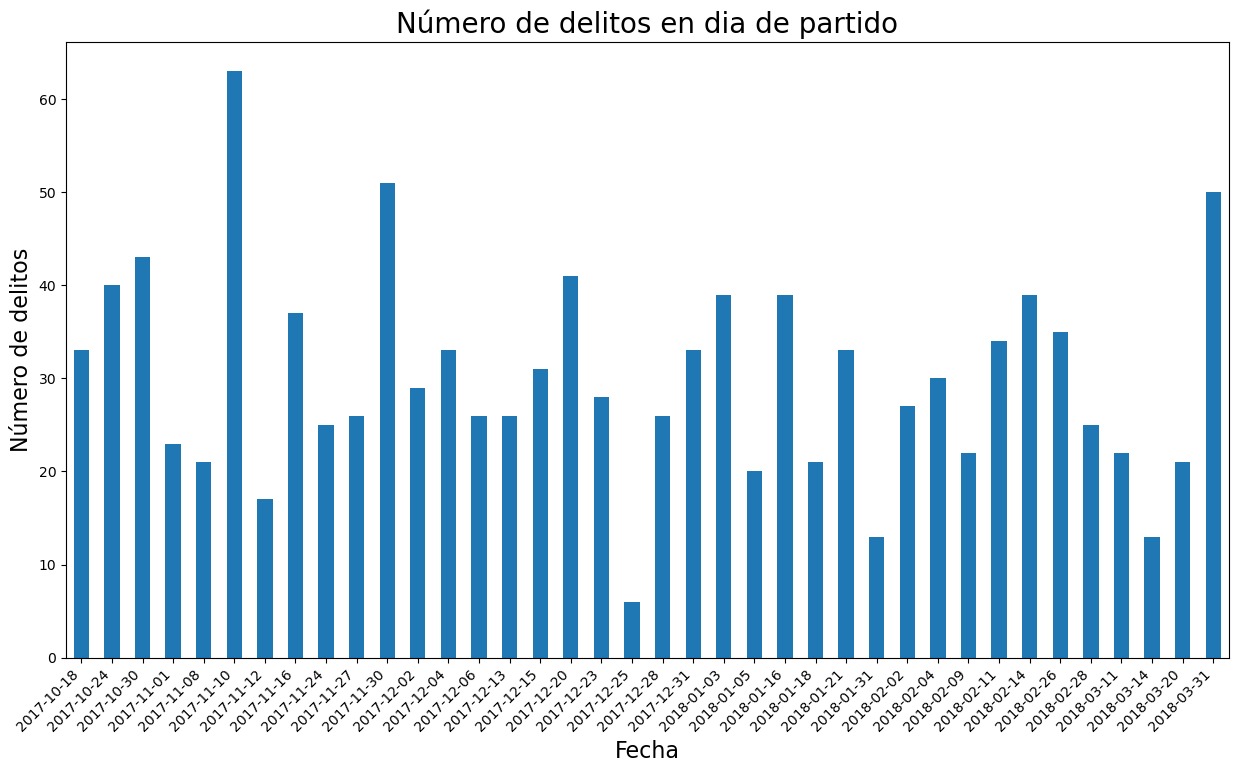

In [926]:
# Convertir la columna OCCURRED_ON_DATE a tipo datetime
crimenes_partidos['OCCURRED_ON_DATE'] = pd.to_datetime(crimenes_partidos['OCCURRED_ON_DATE'])

# Agrupar los datos por fecha y contar el número de delitos
crimenes_por_fecha_Partido = crimenes_partidos.groupby(crimenes_partidos['OCCURRED_ON_DATE'].dt.date)['OFFENSE_DESCRIPTION'].count()

# Generar el diagrama de barras
crimenes_por_fecha_Partido.plot(kind='bar', figsize=(15, 8))

# Configurar el título y los ejes
plt.title('Número de delitos en dia de partido', fontsize=20)
plt.xlabel('Fecha', fontsize=16)
plt.ylabel('Número de delitos', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Mostrar el diagrama de barras
plt.show()


#### A continuación, queremos crear un conjunto de datos que muestre únicamente los crímenes que sucedieron en los días en que no hubo partido.

In [927]:
# Creamos una lista con las fechas de los partidos
fechas_partidos = partidosBoston2017["game_date"].tolist()

# Creamos una lista para almacenar los índices de las filas que coinciden con las fechas de los partidos
indices_eliminar = []

# Recorremos todas las filas del dataset de crímenes
for i, fila in crimenes.iterrows():
    # Si la fecha no coincide con una de las fechas de los partidos, agregamos el índice a la lista
    if fila["OCCURRED_ON_DATE"] in fechas_partidos:
        indices_eliminar.append(i)

# Creamos un nuevo dataset con las filas que no coinciden con las fechas de los partidos
crimenes_sin_partidos = crimenes.drop(indices_eliminar)
crimenes_sin_partidos = crimenes_sin_partidos[['OCCURRED_ON_DATE', 'YEAR', 'OFFENSE_DESCRIPTION']]
crimenes_sin_partidos.head(10)

,OCCURRED_ON_DATE,YEAR,OFFENSE_DESCRIPTION
245880,2018-01-01,2018,LARCENY ALL OTHERS
245920,2018-03-26,2018,FRAUD - WIRE
245965,2018-02-12,2018,PROPERTY - LOST
246219,2018-01-28,2018,PROPERTY - LOST
246327,2018-01-01,2018,INVESTIGATE PROPERTY
264955,2018-03-26,2018,FRAUD - IMPERSONATION
270137,2018-02-19,2018,INVESTIGATE PERSON
287659,2018-01-14,2018,ASSAULT SIMPLE - BATTERY
290199,2018-03-01,2018,HARASSMENT
290200,2018-03-01,2018,VANDALISM


#### Graficamos el conjunto de datos 'crimenes_sin_partidos'. En el eje X colocamos la fecha en que no hubo partido y en el eje Y el número de delitos cometidos ese día. El objetivo es obtener una gráfica que muestre el número de delitos que se cometieron en los días en que no hubo partido.

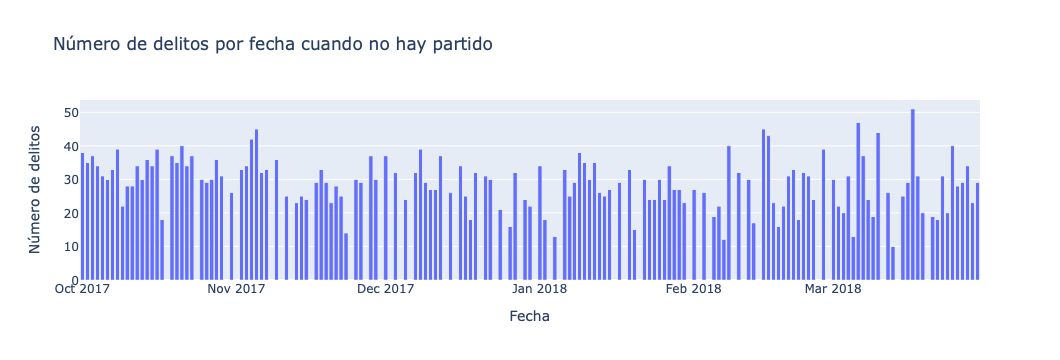

In [928]:


# Agrupar los datos por fecha y contar el número de delitos
crimenes_por_fecha = crimenes_sin_partidos.groupby(crimenes_sin_partidos['OCCURRED_ON_DATE'].dt.date)['OFFENSE_DESCRIPTION'].count()

# Crear un dataframe con los datos
df = pd.DataFrame({'Fecha': crimenes_por_fecha.index, 'Numero de delitos': crimenes_por_fecha.values})

# Crear el gráfico interactivo
fig = px.bar(df, x='Fecha', y='Numero de delitos', title='Número de delitos por fecha cuando no hay partido')

# Configurar el layout
fig.update_layout(xaxis_title='Fecha', yaxis_title='Número de delitos')

# Mostrar el gráfico interactivo
fig.show()

#### Juntamos las dos gráficas obtenidas para poder comparar el número de delitos cometidos en días de partido y en días sin partido.

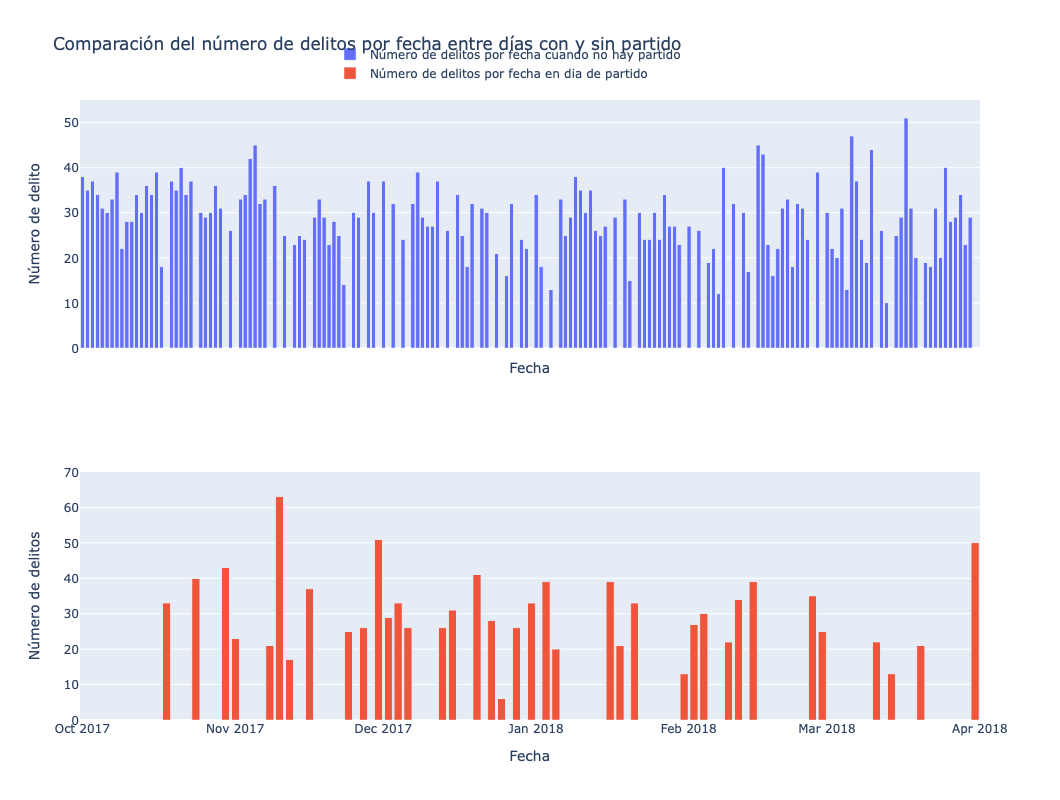

In [929]:


# Agrupar los datos por fecha y contar el número de delitos
crimenes_por_fecha_sin_partido = crimenes_sin_partidos.groupby(crimenes_sin_partidos['OCCURRED_ON_DATE'].dt.date)['OFFENSE_DESCRIPTION'].count()
crimenes_por_fecha_con_partido = crimenes_partidos.groupby(crimenes_partidos['OCCURRED_ON_DATE'].dt.date)['OFFENSE_DESCRIPTION'].count()

# Crear la figura con dos subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.2)

# Trazar la primera gráfica en el primer subplot
fig.add_trace(go.Bar(x=crimenes_por_fecha_sin_partido.index, y=crimenes_por_fecha_sin_partido.values, name='Número de delitos por fecha cuando no hay partido'), row=1, col=1)
fig.update_xaxes(title_text='Fecha', row=1, col=1)
fig.update_yaxes(title_text='Número de delito', range=[0, 55], row=1, col=1)

# Trazar la segunda gráfica en el segundo subplot
fig.add_trace(go.Bar(x=crimenes_por_fecha_con_partido.index, y=crimenes_por_fecha_con_partido.values, name='Número de delitos por fecha en dia de partido'), row=2, col=1)
fig.update_xaxes(title_text='Fecha', row=2, col=1)
fig.update_yaxes(title_text='Número de delitos', range=[0, 70], row=2, col=1)

# Configurar el título y la leyenda de la figura
fig.update_layout(
    title_text='Comparación del número de delitos por fecha entre días con y sin partido',
    height=800, # Altura de la figura
    width=1000, # Ancho de la figura
    legend=dict(
        orientation="h", # Orientación horizontal de la leyenda
        yanchor="bottom", # Anclaje al fondo de la figura
        y=1.02, # Posición vertical
        xanchor="right", # Anclaje a la derecha de la figura
        x=0.5 # Posición horizontal
    )
)

# Mostrar la figura interactiva
fig.show()


#### Calculamos el promedio de delitos cuando hay partido y cuando no lo hay

In [930]:
media_delitos_no_partido = crimenes_por_fecha.mean()
media_delitos_partido = crimenes_por_fecha_Partido.mean()
print("Media de delitos en dia que no hay partido: " + str(media_delitos_no_partido))
print("Media de delitos en dia que si hay partido: " + str(media_delitos_partido))

Media de delitos en dia que no hay partido: 29.0625
Media de delitos en dia que si hay partido: 30.026315789473685


### Interpretación
Como podemos ver en las gráficas y con las medias de crímenes cuando hay partido y cuando no, los crímenes en la ciudad de Boston, concretamente en el distrito Centro (donde se sitúa el estadio), no aumentan significativamente. Observamos que la media de crímenes en este barrio cuando no hay partido de baloncesto es de 29.06, mientras que cuando sí lo hay, aumenta ligeramente a 30.02. Aunque hay un aumento, no es significativo y las gráficas muestran que son prácticamente idénticas en ambos casos.

Es lógico pensar que el crimen podría aumentar durante los días de partido, debido a que hay mucha más gente en la zona y esto puede incrementar la probabilidad de actos de vandalismo u otros tipos de crímenes. Sin embargo, podemos argumentar que durante los días de partido, la policía local del distrito A1 aumenta su número de agentes y los controles de seguridad para evitar que el crimen se dispare. Esto podría explicar por qué no se observa un aumento significativo en los crímenes durante los días de partido en el distrito Centro de Boston.

Es importante tener en cuenta que estos resultados se limitan a una ciudad y un distrito específico, por lo que no se pueden generalizar a otras ciudades o regiones y, que los datos que tenemos se limitan a los delitos que han sido reportados y registrados. 

Es posible que existan delitos que no han sido reportados y, por lo tanto, no están incluidos en el análisis. También es importante considerar que los delitos pueden tener diferentes grados de severidad y, por lo tanto, algunos delitos pueden ser más propensos a ser reportados que otros.

En cualquier caso, el análisis de estos datos nos proporciona una perspectiva valiosa sobre la relación entre los eventos deportivos y la criminalidad en Boston. Aunque no parece haber una correlación directa entre los eventos deportivos y el aumento del crimen en la ciudad, esto no significa necesariamente que no exista ninguna relación. Es posible que los eventos deportivos tengan un impacto indirecto en el crimen, como aumentar la concentración de personas en la ciudad o crear oportunidades para la actividad delictiva.



In [931]:
# Convertir la columna OCCURRED_ON_DATE a tipo datetime
crimenes_partidos['OCCURRED_ON_DATE'] = pd.to_datetime(crimenes_partidos['OCCURRED_ON_DATE'])

# Agrupar los delitos por fecha y contar el número de delitos para cada fecha
crimenes_por_fecha = crimenes_partidos.groupby(crimenes_partidos['OCCURRED_ON_DATE'].dt.date)['OFFENSE_DESCRIPTION'].count()

# Ordenar las fechas de manera descendente según el número de delitos
crimenes_por_fecha_ordenados = crimenes_por_fecha.sort_values(ascending=False)

# Seleccionar las primeras tres fechas en la lista ordenada
top_3_fechas = crimenes_por_fecha_ordenados.index[:3]

print("3 dias con mas crimenes en dia de partido:")
for fecha in top_3_fechas:
    print(fecha)

3 dias con mas crimenes en dia de partido:
2017-11-10
2017-11-30
2018-03-31


In [932]:
# Obtener los índices de los tres días con más delitos
top_3_dias = crimenes_por_fecha.nlargest(3).index

# Crear un DataFrame con los delitos de los tres días anteriores
delitos_top_3_dias = crimenes_partidos[crimenes_partidos['OCCURRED_ON_DATE'].dt.date.isin(top_3_dias)]

# Contar el número de delitos por día
delitos_por_dia = delitos_top_3_dias.groupby(delitos_top_3_dias['OCCURRED_ON_DATE'].dt.date)['OFFENSE_DESCRIPTION'].count()

# Imprimir el número de delitos por día
for fecha, num_delitos in delitos_por_dia.iteritems():
    print("Fecha: " + str(fecha) + ", Numero de delitos: " + str(num_delitos))

Fecha: 2017-11-10, Numero de delitos: 63
Fecha: 2017-11-30, Numero de delitos: 51
Fecha: 2018-03-31, Numero de delitos: 50


#### Graficamos los 3 dias con mas crimenes en dia de partido, con lineas horizontales para mostrar las medias

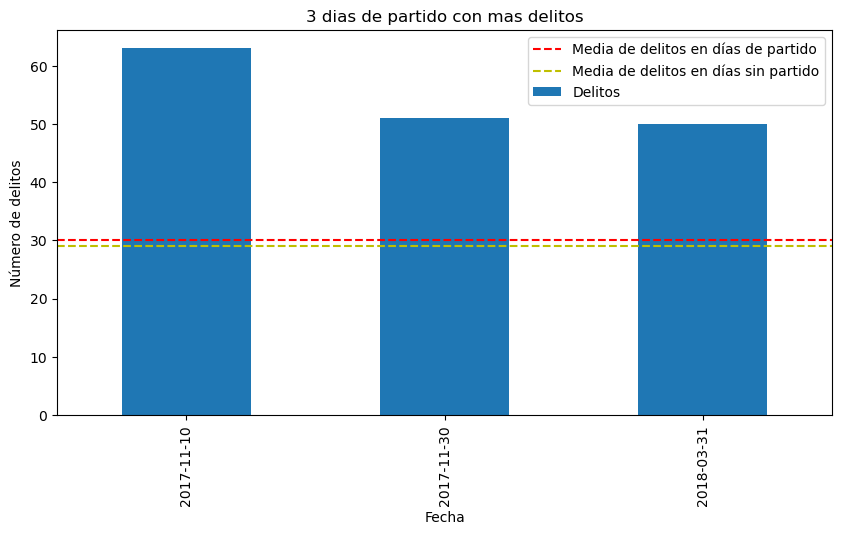

In [933]:

# Crear la figura y el subplot
fig, ax = plt.subplots(figsize=(10, 5))

delitos_por_dia.plot(kind='bar', ax=ax, label='Delitos')
ax.axhline(y=media_delitos_partido, color='r', linestyle='--', label='Media de delitos en días de partido')
ax.axhline(y=media_delitos_no_partido, color='y', linestyle='--', label='Media de delitos en días sin partido')
ax.legend()

# Establecer las etiquetas de los ejes y el título
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de delitos')
ax.set_title('3 dias de partido con mas delitos')

# Mostrar el gráfico
plt.show()


### Interpretación
En la gráfica anterior se puede observar que en algunos días el número de crímenes se duplica. Hemos seleccionado los tres días con mayor número de crímenes y hemos representado su frecuencia en una gráfica para su análisis. Además, se han dibujado dos líneas que muestran las medias de crímenes en días de partido y en días sin partido. Se puede apreciar que los tres días con mayor número de crímenes están claramente por encima de la media tanto en días de partido como en días sin partido. Por lo tanto, el aumento en el crimen no parece estar directamente relacionado con la celebración de eventos deportivos. Es posible que haya otros factores que influyan en estos días específicos, como festividades locales o acontecimientos inesperados en la zona. Sería necesario investigar más para determinar con certeza las causas de este aumento en la criminalidad en esos días específicos.


#### Mostramos los tipos de delito que existen en el dataset 

In [938]:
# Seleccionar la fecha de la primera fila del primer dataset
fecha = delitos_por_dia.index[0]

# Seleccionar las filas del segundo dataset que coinciden con la fecha
merged_fecha = crimenes_partidos[crimenes_partidos['OCCURRED_ON_DATE'].dt.date == fecha]
for item in merged_fecha['OFFENSE_DESCRIPTION'].unique():
    print(item)
# Imprimir las filas
merged_fecha.head(10)

PROPERTY - LOST
M/V ACCIDENT - OTHER
HARASSMENT
INVESTIGATE PERSON
LARCENY THEFT OF BICYCLE
AUTO THEFT
TOWED MOTOR VEHICLE
INVESTIGATE PROPERTY
LICENSE PREMISE VIOLATION
ASSAULT - AGGRAVATED - BATTERY
SICK/INJURED/MEDICAL - PERSON
PROPERTY - FOUND
ASSAULT SIMPLE - BATTERY
VANDALISM
TRESPASSING
DRUGS - SICK ASSIST - HEROIN
VIOLATION - CITY ORDINANCE
DRUGS - POSS CLASS B - COCAINE, ETC.
LARCENY SHOPLIFTING
DRUGS - OTHER
VERBAL DISPUTE
FRAUD - CREDIT CARD / ATM FRAUD
SICK/INJURED/MEDICAL - POLICE
NOISY PARTY/RADIO-NO ARREST
DANGEROUS OR HAZARDOUS CONDITION
BURGLARY - COMMERICAL - NO FORCE
DISORDERLY CONDUCT
LIQUOR LAW VIOLATION


,OCCURRED_ON_DATE,matchup_home,wl_home,YEAR,OFFENSE_DESCRIPTION
160,2017-11-10,BOS vs. CHA,W,2017,PROPERTY - LOST
161,2017-11-10,BOS vs. CHA,W,2017,PROPERTY - LOST
162,2017-11-10,BOS vs. CHA,W,2017,M/V ACCIDENT - OTHER
163,2017-11-10,BOS vs. CHA,W,2017,HARASSMENT
164,2017-11-10,BOS vs. CHA,W,2017,INVESTIGATE PERSON
165,2017-11-10,BOS vs. CHA,W,2017,LARCENY THEFT OF BICYCLE
166,2017-11-10,BOS vs. CHA,W,2017,AUTO THEFT
167,2017-11-10,BOS vs. CHA,W,2017,TOWED MOTOR VEHICLE
168,2017-11-10,BOS vs. CHA,W,2017,INVESTIGATE PROPERTY
169,2017-11-10,BOS vs. CHA,W,2017,PROPERTY - LOST


#### Quitamos estos delitos: TOWED MOTOR VEHICLE, LARCENY THEFT OF BICYCLE, PROPERTY - FOUND, TRESPASSING, LARCENY SHOPLIFTING, FRAUD - CREDIT CARD / ATM FRAUD, DANGEROUS OR HAZARDOUS CONDITION

In [935]:
crimes_to_remove = ['TOWED MOTOR VEHICLE', 'LARCENY THEFT OF BICYCLE',
                    'PROPERTY - FOUND', 'TRESPASSING', 'LARCENY SHOPLIFTING', 'FRAUD - CREDIT CARD / ATM FRAUD',
                    'DANGEROUS OR HAZARDOUS CONDITION', 'LICENSE PREMISE VIOLATION']

filtered_df = merged_fecha[~merged_fecha['OFFENSE_DESCRIPTION'].isin(crimes_to_remove)]
filtered_df.head(10)

,OCCURRED_ON_DATE,matchup_home,wl_home,YEAR,OFFENSE_DESCRIPTION
160,2017-11-10,BOS vs. CHA,W,2017,PROPERTY - LOST
161,2017-11-10,BOS vs. CHA,W,2017,PROPERTY - LOST
162,2017-11-10,BOS vs. CHA,W,2017,M/V ACCIDENT - OTHER
163,2017-11-10,BOS vs. CHA,W,2017,HARASSMENT
164,2017-11-10,BOS vs. CHA,W,2017,INVESTIGATE PERSON
166,2017-11-10,BOS vs. CHA,W,2017,AUTO THEFT
168,2017-11-10,BOS vs. CHA,W,2017,INVESTIGATE PROPERTY
169,2017-11-10,BOS vs. CHA,W,2017,PROPERTY - LOST
171,2017-11-10,BOS vs. CHA,W,2017,ASSAULT - AGGRAVATED - BATTERY
172,2017-11-10,BOS vs. CHA,W,2017,SICK/INJURED/MEDICAL - PERSON


### Interpretación

Al eliminar estos delitos, nos enfocamos en aquellos que pueden estar más directamente relacionados con la celebración de eventos deportivos en la ciudad de Boston. Buscamos obtener información más relevante y enfocada para analizar la relación entre los eventos deportivos y el aumento de la criminalidad en Boston.

Es posible que los delitos que eliminamos ocurran con más frecuencia, pero no necesariamente tienen una relación directa con los eventos deportivos. Al centrarnos en los delitos restantes, esperamos obtener una imagen más clara y precisa de cómo los eventos deportivos pueden influir en la criminalidad en Boston.

Observamos que los delitos que quedan son los que podrían ser más propensos a ocurrir durante un evento deportivo de este tamaño, en este caso, el baloncesto. Sin embargo, parece que hay relativamente pocos delitos, lo que podría deberse al refuerzo policial en Boston para prevenir estos tipos de crímenes durante los eventos deportivos.

# Conclusión Final

Los datos analizados sugieren que no hay un aumento significativo en los crímenes en el distrito Centro de Boston durante los días de partido de baloncesto. Aunque hay un ligero aumento en la media de crímenes, este no es estadísticamente significativo. También es posible que la presencia policial durante estos eventos tenga un impacto en la prevención de la actividad delictiva.

Es importante tener en cuenta que estos resultados se limitan a una ciudad y un distrito específico, y que no se pueden generalizar a otras ciudades o regiones. Además, es posible que existan delitos que no se hayan reportado y, por lo tanto, no se incluyan en el análisis.